#### Sharing data using retail data from one of mineral company in Indonesia

In [878]:
#### IMPORTS

import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from tensorflow import keras
from zipfile import ZipFile
from urllib.request import urlopen
from urllib.error import HTTPError
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_log_error, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.exceptions import DataConversionWarning

#### TURNING OFF WARNINGS

# Turning off DataConversion warning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# Turning off keras warnings
# tf.logging.set_verbosity(tf.logging.ERROR)
# Turning off the chained assignment warning
pd.options.mode.chained_assignment = None

# Fixing random number generator's seed to get reproducible results

# tf.random.set_random_seed(20)
np.random.seed(20)

#### Here we check dataset existance and read the dataset into a pandas dataframe called "data"

In [915]:
data = pd.read_csv('tespgi.csv')

In [916]:
print("We have", data.shape[0], "rows and", data.shape[1], "columns in our data")

We have 2553 rows and 5 columns in our data


In [917]:
data.head()

,period,region,sku,sales amount,pandemic
0,1/1/2019,Indonesia,sku 141,1534653.4,0
1,2/1/2019,Indonesia,sku 141,1310567.4,0
2,3/1/2019,Indonesia,sku 141,1496013.1,0
3,4/1/2019,Indonesia,sku 141,1482934.5,0
4,5/1/2019,Indonesia,sku 141,1527241.0,0


In [918]:
len(data.index)

2553

In [919]:
data.sort_values(by=['period','region','sku'])

,period,region,sku,sales amount,pandemic
222,1/1/2019,Indonesia,SKU12354,59503.1,0
259,1/1/2019,Indonesia,SKU12354,20664.0,0
296,1/1/2019,Indonesia,SKU12354,24574.0,0
0,1/1/2019,Indonesia,sku 141,1534653.4,0
37,1/1/2019,Indonesia,sku 341,747891.9,0
...,...,...,...,...,...
1956,9/1/2021,Sumatera,sku6543,2734.9,1
2067,9/1/2021,Sumatera,sku6544,2163.8,1
1808,9/1/2021,Sumatera,sku76,28365.0,1
2030,9/1/2021,Sumatera,sku788,2520.4,1


#### grouping the data

because there is duplication data from many source of operational agent we need to sum all the data 

In [988]:
data_group =  pd.pivot_table(data, 
                values='sales amount', 
                index=['period','region','sku'], 
                
                aggfunc='sum')

In [989]:
data_group = data_group.reset_index()

#### Data analysis and create new information based on date

In [922]:
data_group

,period,region,sku,sales amount
0,1/1/2019,Indonesia,SKU12354,104741.1
1,1/1/2019,Indonesia,sku 141,1534653.4
2,1/1/2019,Indonesia,sku 341,747891.9
3,1/1/2019,Indonesia,sku12,62249.1
4,1/1/2019,Indonesia,sku43,8457.7
...,...,...,...,...
2141,9/1/2021,Sumatera,sku6543,2734.9
2142,9/1/2021,Sumatera,sku6544,2163.8
2143,9/1/2021,Sumatera,sku76,28365.0
2144,9/1/2021,Sumatera,sku788,2520.4


In [923]:
data_group['month'] = pd.to_datetime(data_group['period']).dt.month

In [924]:
data_group['year'] = pd.to_datetime(data_group['period']).dt.year

In [925]:
data_group=data_group.dropna()

<Axes: ylabel='sales amount'>

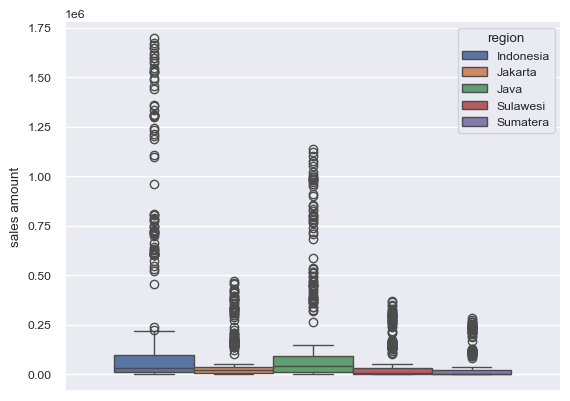

In [930]:
sns.boxplot(data= data_group,y='sales amount',hue='region')

we need to remove non sales data and small sales data wich might be not relevan to business

In [933]:
data_group = data_group[data_group['sales amount']>100]

In [934]:
data_group = data_group.drop_duplicates()

In [935]:
data_group

,period,region,sku,sales amount,month,year
0,1/1/2019,Indonesia,SKU12354,104741.1,1,2019
1,1/1/2019,Indonesia,sku 141,1534653.4,1,2019
2,1/1/2019,Indonesia,sku 341,747891.9,1,2019
3,1/1/2019,Indonesia,sku12,62249.1,1,2019
4,1/1/2019,Indonesia,sku43,8457.7,1,2019
...,...,...,...,...,...,...
2141,9/1/2021,Sumatera,sku6543,2734.9,9,2021
2142,9/1/2021,Sumatera,sku6544,2163.8,9,2021
2143,9/1/2021,Sumatera,sku76,28365.0,9,2021
2144,9/1/2021,Sumatera,sku788,2520.4,9,2021


#### feature engineriing

convert categorcal data to numeric

In [990]:
data_group  = pd.get_dummies(data_group, columns=['region'], prefix='region')

In [938]:
col_region = [x for x in data2.columns if x.split('_')[0] =='region']

In [939]:
data_group  = pd.get_dummies(data_group, columns=['sku'], prefix='sku')

In [940]:
data_group.columns

Index(['period', 'sales amount', 'month', 'year', 'region_Indonesia',
       'region_Jakarta', 'region_Java', 'region_Sulawesi', 'region_Sumatera',
       'sku_SKU12354', 'sku_sku 141', 'sku_sku 341', 'sku_sku12', 'sku_sku43',
       'sku_sku555', 'sku_sku556', 'sku_sku557', 'sku_sku6543', 'sku_sku6544',
       'sku_sku6545', 'sku_sku76', 'sku_sku788', 'sku_sku87'],
      dtype='object')

In [941]:
col_sku = [x for x in data_group.columns if x.split('_')[0]=='sku']

#### def sequence function 

sec data will be use for RNN/LSTM model

In [942]:
def create_data_sequence(X, y, time_steps=1):
    """ Create data sequence
    
    Arguments:
        * X: time-series data
        * y: Count "cnt" value
        * time_steps: Used to create input sequence of timesteps
    
    Returns:
        * input_sequence: Numpy array of sequences of time-series data
        * output: Numpy array of output i.e. next value for respective sequence
    
    """
    input_sequence, output = [], []
    for i in range(len(X) - time_steps):
        sequence = X.iloc[i:(i + time_steps)].values
        input_sequence.append(sequence)        
        output.append(y.iloc[i + time_steps])
    return np.array(input_sequence), np.array(output)

time step 12 because the data is monthly data

In [943]:
time_steps = 12

def the model data using keras LSTM the loss using MSe because not particulary there is much extreme outlier

In [944]:
def machine_learning_model():
    """Defines machine learning model
    
    Returns:
        * model: LSTM model
    
    """
    model = keras.Sequential()
    model.add(keras.layers.LSTM(units=128,input_shape=(training_set_sequence.shape[1], training_set_sequence.shape[2])))
    model.add(keras.layers.Dropout(rate=0.2))
    model.add(keras.layers.Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='Adam')
    model.summary()
    return model

In [945]:
model = machine_learning_model()

c:\Users\cbcbx\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_26 (LSTM)                  │ (None, 128)            │        77,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_26 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 77,441 (302.50 KB)

 Non-trainable params: 0 (0.00 B)

In [946]:
data_group

,period,sales amount,month,year,region_Indonesia,region_Jakarta,region_Java,region_Sulawesi,region_Sumatera,sku_SKU12354,...,sku_sku43,sku_sku555,sku_sku556,sku_sku557,sku_sku6543,sku_sku6544,sku_sku6545,sku_sku76,sku_sku788,sku_sku87
0,1/1/2019,104741.1,1,2019,True,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,1/1/2019,1534653.4,1,2019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1/1/2019,747891.9,1,2019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1/1/2019,62249.1,1,2019,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1/1/2019,8457.7,1,2019,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2141,9/1/2021,2734.9,9,2021,False,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2142,9/1/2021,2163.8,9,2021,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2143,9/1/2021,28365.0,9,2021,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2144,9/1/2021,2520.4,9,2021,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


In [947]:
for i in col_region:
    data_group[i] = [int(x) for x in data_group[i]]

In [948]:
for i in col_sku:
    data_group[i] = [int(x) for x in data_group[i]]

In [949]:
data_group =data_group.set_index('period')

In [950]:
data_group.columns

Index(['sales amount', 'month', 'year', 'region_Indonesia', 'region_Jakarta',
       'region_Java', 'region_Sulawesi', 'region_Sumatera', 'sku_SKU12354',
       'sku_sku 141', 'sku_sku 341', 'sku_sku12', 'sku_sku43', 'sku_sku555',
       'sku_sku556', 'sku_sku557', 'sku_sku6543', 'sku_sku6544', 'sku_sku6545',
       'sku_sku76', 'sku_sku788', 'sku_sku87'],
      dtype='object')

#### create training and testing data

testing data use the latest data for validation that the model can predict the future

In [951]:
training_set_size = int(len(data_group)*0.75)
test_set_size = len(data_group)-training_set_size
training_set,test_set = data_group.iloc[0:training_set_size],data_group.iloc[training_set_size:len(data)]
print("Length of training set is", len(training_set))    
print("Length of test set is",len(test_set))

    

Length of training set is 1517
Length of test set is 506


create thesequence data

In [952]:
cnt_transformer = StandardScaler().fit(training_set[['sales amount']])
yearscaler = MinMaxScaler().fit(training_set[['year']])
training_set['cnt'] = cnt_transformer.transform(training_set[['sales amount']])
training_set['year'] = yearscaler.transform(training_set[['year']])
training_set = training_set.drop(columns='sales amount')
test_set['cnt'] = cnt_transformer.transform(test_set[['sales amount']])
test_set['year'] = yearscaler.transform(test_set[['year']])
test_set = test_set.drop(columns='sales amount')
training_set_sequence, training_set_output = create_data_sequence(training_set, training_set.cnt, time_steps)
test_set_sequence, test_set_output = create_data_sequence(test_set, test_set.cnt, time_steps)

In [953]:
print(len(training_set))

1517


In [954]:
training_set_sequence[0]

array([[ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.01387297],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  5.72366118],
       [ 1.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.56677458],
       [ 1.        

#### modeling the data

epoch use 24  and batch size 4 basd on the number of the data. make sure the number of retraining enought to represent the data. make sure the loss accurate (sometimes trial and eror). do not need bi directional model

In [955]:
model = machine_learning_model()

history = model.fit(
    training_set_sequence,
    training_set_output, 
    epochs=24, 
    batch_size=4, 
    validation_split=0.1,
    shuffle=False,
)

c:\Users\cbcbx\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_27 (LSTM)                  │ (None, 128)            │        77,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_27 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 77,441 (302.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - loss: 0.7908 - val_loss: 0.2711
Epoch 2/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.2516 - val_loss: 0.0765
Epoch 3/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1072 - val_loss: 0.0708
Epoch 4/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0651 - val_loss: 0.0516
Epoch 5/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0677 - val_loss: 0.0405
Epoch 6/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0411 - val_loss: 0.0394
Epoch 7/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0405 - val_loss: 0.0271
Epoch 8/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0379 - val_loss: 0.0355
Epoch 9/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0394 - val_loss: 0.0337
Epoch 10/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0462 - val_loss: 0.0365
Epoch 11/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0393 - val_loss: 0.0441
Epoch 12/24
339/339 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step

loss value model

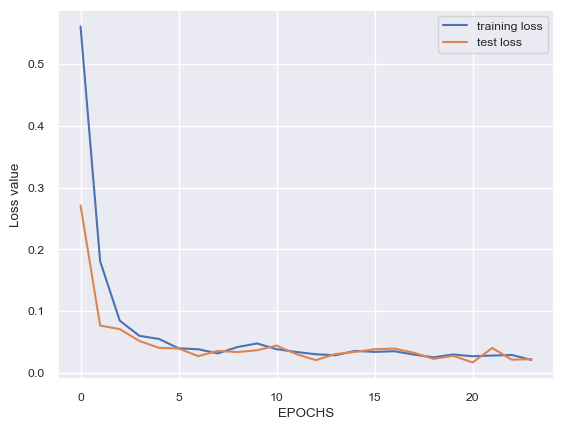

In [956]:
fig,ax = plt.subplots()
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='test loss')
ax.set_xlabel('EPOCHS')
ax.set_ylabel('Loss value')
plt.legend();

In [957]:
train_set_predictions = model.predict(training_set_sequence)


48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step


In [958]:
train_set_predictions[:6]

array([[-0.29004616],
       [-0.25784323],
       [ 0.9318981 ],
       [ 0.19026981],
       [-0.37717155],
       [-0.43436998]], dtype=float32)

In [959]:
len(train_set_predictions)

1505

In [960]:
training_set['cnt'][:6]

period
1/1/2019   -0.013873
1/1/2019    5.723661
1/1/2019    2.566775
1/1/2019   -0.184372
1/1/2019   -0.400211
1/1/2019   -0.400211
Name: cnt, dtype: float64

In [961]:
test_set_predictions = model.predict(test_set_sequence)


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [962]:
test_set_predictions[:10]

array([[-0.18677251],
       [ 5.0844154 ],
       [ 2.3857956 ],
       [-0.12396429],
       [-0.3677959 ],
       [-0.38753584],
       [-0.37660402],
       [-0.32904148],
       [-0.38954297],
       [-0.28306913]], dtype=float32)

In [963]:
actual_testset_values = [[x] for x in test_set_output]

In [964]:
actual_testset_values[:10]

[[-0.04678676982241516],
 [6.039932256310328],
 [2.7909008259336434],
 [-0.1894241969978538],
 [-0.39591065337671666],
 [-0.39591065337671666],
 [-0.3845869553207868],
 [-0.28585478894326105],
 [-0.3845869553207868],
 [-0.21864087076010444]]

In [965]:
actual_testset_values = np.array(actual_testset_values)

In [966]:
training_set,test_set = data_group.iloc[0:training_set_size],data_group.iloc[training_set_size:len(data)]

In [967]:
print(len(actual_testset_values))
print(len(test_set_predictions))
# print(len())
print(len(test_set_output))
print(len(test_set))


494
494
494
506


#### comparison result

using transform sales

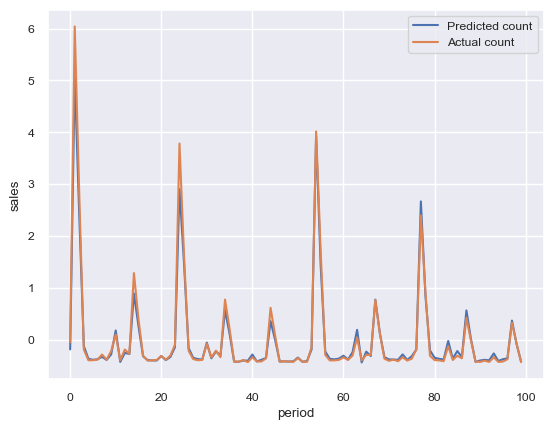

In [968]:
fig,ax = plt.subplots()
plt.plot(test_set_predictions[:100,], label='Predicted count')
plt.plot(actual_testset_values[:100,], label='Actual count')
ax.set_xlabel('period')
ax.set_ylabel('sales')
plt.legend();
plt.show()

In [970]:
mean_absolute_percentage_error(test_set_predictions,actual_testset_values)

0.3315267312237736

In [971]:
data_group.tail(test_set_size).head()

,sales amount,month,year,region_Indonesia,region_Jakarta,region_Java,region_Sulawesi,region_Sumatera,sku_SKU12354,sku_sku 141,...,sku_sku43,sku_sku555,sku_sku556,sku_sku557,sku_sku6543,sku_sku6544,sku_sku6545,sku_sku76,sku_sku788,sku_sku87
period,,,,,,,,,,,,,,,,,,,,,
6/1/2021,2076.3,6,2021,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6/1/2021,3129.6,6,2021,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6/1/2021,15328.6,6,2021,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
6/1/2021,243097.4,6,2021,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
6/1/2021,112006.5,6,2021,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [972]:
inverse_test_prediction = cnt_transformer.inverse_transform(test_set_predictions)

In [973]:
inverse_test_prediction[:5]

array([[  61650.953],
       [1375340.1  ],
       [ 702788.25 ],
       [  77304.06 ],
       [  16536.172]], dtype=float32)

In [974]:
tes_data_sales = cnt_transformer.inverse_transform(actual_testset_values)
tes_data_sales[:5]

array([[  96538.3],
       [1613474.7],
       [ 803748.8],
       [  60990.1],
       [   9529.4]])

In [975]:
sl =[]
sales_comp = pd.DataFrame(sl)

In [976]:
sales_comp['tes_data_sales']=pd.DataFrame(tes_data_sales)
sales_comp['inverse_test_prediction']=pd.DataFrame(inverse_test_prediction)

In [977]:
sales_comp['tes_data_sales']= [int(x) for x in sales_comp['tes_data_sales']]
sales_comp['inverse_test_prediction']= [int(x) for x in sales_comp['inverse_test_prediction']]
sales_comp

,tes_data_sales,inverse_test_prediction
0,96538,61650
1,1613474,1375340
2,803748,702788
3,60990,77304
4,9529,16536
...,...,...
489,2734,14175
490,2163,9394
491,28365,43472
492,2520,9397


using real sales data

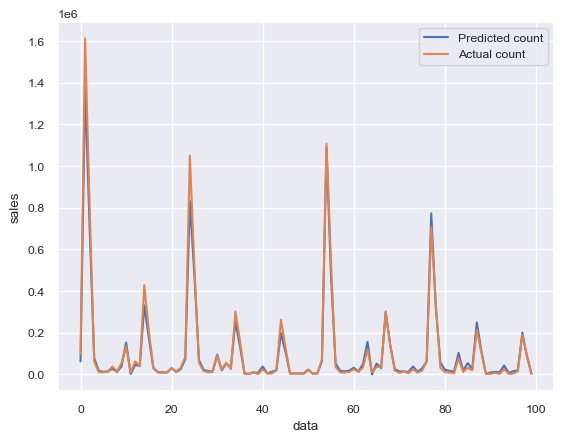

In [986]:
fig,ax = plt.subplots()
plt.plot(sales_comp['inverse_test_prediction'][:100], label='Predicted count')
plt.plot(sales_comp['tes_data_sales'][:100], label='Actual count')
ax.set_xlabel('data')
ax.set_ylabel('sales')
plt.legend();
plt.show()

In [979]:
test_set_comp =data_group.iloc[training_set_size+time_steps:len(data)]

In [980]:
test_set_comp = test_set_comp.reset_index()

In [981]:
test_set_comp = pd.DataFrame(test_set_comp)

In [982]:
test_set_comp['prediction'] =sales_comp['inverse_test_prediction']

In [983]:
test_set_comp[['sales amount','region_Indonesia','prediction']]

,sales amount,region_Indonesia,prediction
0,96538.3,1,61650
1,1613474.7,1,1375340
2,803748.8,1,702788
3,60990.1,1,77304
4,9529.4,1,16536
...,...,...,...
489,2734.9,0,14175
490,2163.8,0,9394
491,28365.0,0,43472
492,2520.4,0,9397


In [984]:
mean_absolute_error(test_set_comp['prediction'],test_set_comp['sales amount'])

18180.01133603239

In [985]:
mean_absolute_percentage_error(test_set_comp['prediction'],test_set_comp['sales amount'])

0.434575975017157

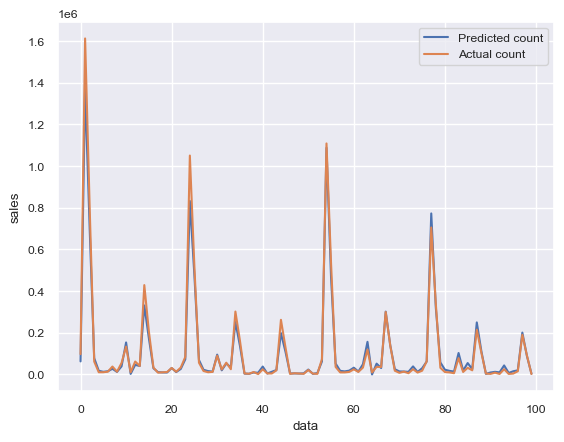

In [987]:
fig,ax = plt.subplots()
plt.plot(test_set_comp['prediction'][:100], label='Predicted count')
plt.plot(test_set_comp['sales amount'][:100], label='Actual count')
ax.set_xlabel('data')
ax.set_ylabel('sales')
plt.legend();
plt.show()